In [1]:
import pandas as pd
url = 'https://raw.githubusercontent.com/pia222sk20/python_src/refs/heads/main/data/titanic.csv'
titanic = pd.read_csv(url)
titanic = titanic.rename(columns={'Sex':"Gender"})
titanic.head(2)

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [2]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Gender       891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:

titanic.describe(include='object')

,Name,Gender,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,G6,S
freq,1,577,7,4,644


In [5]:

titanic.isna().mean().sort_values(ascending=False)

Cabin          0.771044
Age            0.198653
Embarked       0.002245
PassengerId    0.000000
Name           0.000000
Pclass         0.000000
Survived       0.000000
Gender         0.000000
Parch          0.000000
SibSp          0.000000
Fare           0.000000
Ticket         0.000000
dtype: float64

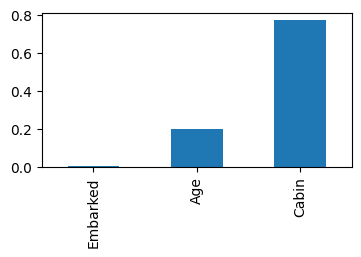

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(4,2))
temp = titanic.isna().mean()
temp[temp>0].sort_values().plot(kind='bar')
plt.show()

In [7]:

%pip install missingno

   ---------------------------------------- 0.0/38.5 MB ? eta -:--:--
   - -------------------------------------- 1.3/38.5 MB 9.0 MB/s eta 0:00:05
   --- ------------------------------------ 3.4/38.5 MB 8.5 MB/s eta 0:00:05
   ---- ----------------------------------- 4.2/38.5 MB 7.0 MB/s eta 0:00:05
   ----- ---------------------------------- 5.2/38.5 MB 7.2 MB/s eta 0:00:05
   -------- ------------------------------- 8.1/38.5 MB 8.0 MB/s eta 0:00:04
   --------- ------------------------------ 9.2/38.5 MB 7.4 MB/s eta 0:00:04
   --------------- ------------------------ 14.7/38.5 MB 10.4 MB/s eta 0:00:03
   ------------------ --------------------- 17.8/38.5 MB 10.9 MB/s eta 0:00:02
   ------------------- -------------------- 18.9/38.5 MB 11.1 MB/s eta 0:00:02
   ---------------------- ----------------- 22.0/38.5 MB 10.7 MB/s eta 0:00:02
   ----------------------- ---------------- 22.3/38.5 MB 9.8 MB/s eta 0:00:02
   --------------------------- ------------ 26.2/38.5 MB 10.8 MB/s eta 0:0

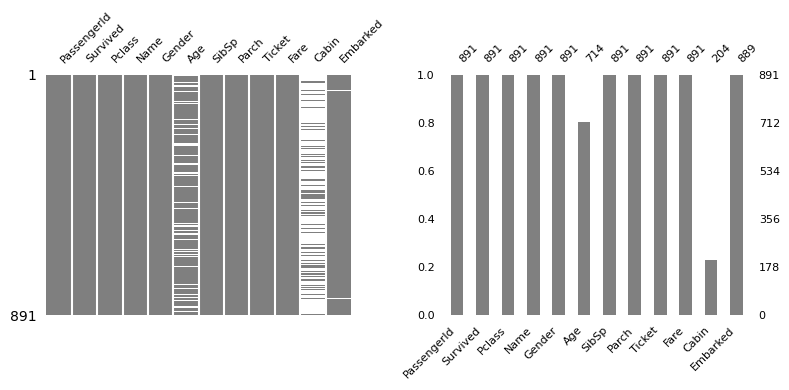

In [8]:

import missingno as msno

fig, axes = plt.subplots(1,2,figsize=(8,4))


msno.matrix(df=titanic,figsize=(4,4),fontsize=8,color=(0.5,0.5,0.5), ax=axes[0],sparkline=False)
msno.bar(df=titanic,figsize=(4,4),fontsize=8,color=(0.5,0.5,0.5), ax=axes[1])
plt.tight_layout()
plt.show()

In [9]:
# age컬럼의 결측치가 있는 모든 row를 출력
import numpy as np
test = pd.DataFrame({
    'a' : [1,np.nan,6,np.nan],
    'b' : [2,5,6,np.nan],
    'c' : [3,5,9,3]
})
test[test.isna().any(axis=1)]

,a,b,c
1,NaN,5.0,5
3,NaN,NaN,3


In [10]:

missing_df = titanic[titanic.drop(columns=['Cabin']).isna().any(axis=1)]
missing_df.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q


In [14]:

# Embarked 가 결측치인  row 데이터를 출력
titanic[titanic.Embarked.isna()]

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [15]:

k = 3
df_lists = []
for i in titanic[titanic.Embarked.isna()].index:
    df_lists.append(titanic.loc[i-k : i+k])

pd.concat(df_lists)

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
58,59,1,2,"West, Miss. Constance Mirium",female,5.00,1,2,C.A. 34651,27.7500,NaN,S
59,60,0,3,"Goodwin, Master. William Frederick",male,11.00,5,2,CA 2144,46.9000,NaN,S
60,61,0,3,"Sirayanian, Mr. Orsen",male,22.00,0,0,2669,7.2292,NaN,C
61,62,1,1,"Icard, Miss. Amelie",female,38.00,0,0,113572,80.0000,B28,NaN
62,63,0,1,"Harris, Mr. Henry Birkhardt",male,45.00,1,0,36973,83.4750,C83,S
63,64,0,3,"Skoog, Master. Harald",male,4.00,3,2,347088,27.9000,NaN,S
64,65,0,1,"Stewart, Mr. Albert A",male,NaN,0,0,PC 17605,27.7208,NaN,C
826,827,0,3,"Lam, Mr. Len",male,NaN,0,0,1601,56.4958,NaN,S
827,828,1,2,"Mallet, Master. Andre",male,1.00,0,2,S.C./PARIS 2079,37.0042,NaN,C
828,829,1,3,"McCormack, Mr. Thomas Joseph",male,NaN,0,0,367228,7.7500,NaN,Q


c:\Users\sally\SKNPYWORKSPACE\streamlit\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49373 (\N{HANGUL SYLLABLE SAENG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\sally\SKNPYWORKSPACE\streamlit\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51316 (\N{HANGUL SYLLABLE JON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\sally\SKNPYWORKSPACE\streamlit\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 54869 (\N{HANGUL SYLLABLE HWAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\sally\SKNPYWORKSPACE\streamlit\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50984 (\N{HANGUL SYLLABLE YUL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\sally\SKNPYWORKSPACE\streamlit\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51064 (\N{HANGUL SYL

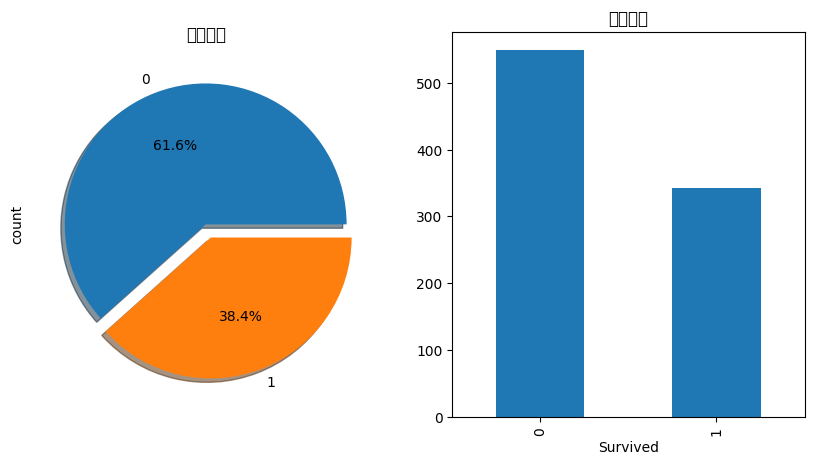

In [24]:
# 생존유무  pie 그래프
f,ax = plt.subplots(1,2,figsize=(10,5))
ax[0].set_title('생존확율')
titanic.Survived.value_counts().plot.pie(autopct='%1.1f%%',shadow=True,explode = [0,0.1],ax=ax[0])

ax[1].set_title('생존인원')
titanic.Survived.value_counts().plot(kind='bar',ax=ax[1])
plt.show()

In [19]:
# 선실 등급별(pclass) 생존 유무
titanic.groupby('Pclass')['Survived'].sum()

Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64

In [22]:
# 크로스탭
pd.crosstab(titanic['Pclass'], titanic['Survived'], margins=True).style.background_gradient()

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [25]:
# seaborn
import seaborn as sns


C:\Users\sally\AppData\Local\Temp\ipykernel_19824\922875988.py:1: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.countplot(data=titanic,x='Pclass',hue = 'Survived',palette=['black','hotpink','pink'],legend=True)


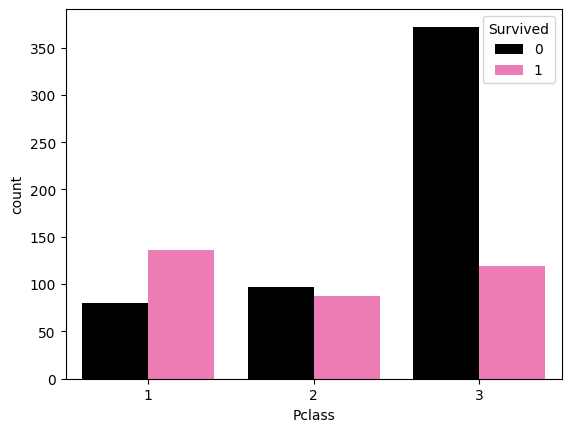

In [40]:
sns.countplot(data=titanic,x='Pclass',hue = 'Survived',palette=['black','hotpink','pink'],legend=True)
plt.show()

C:\Users\sally\AppData\Local\Temp\ipykernel_19824\1383104582.py:1: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.countplot(data=titanic,x='Gender',hue = 'Survived',palette=['black','hotpink','pink'],legend=True)


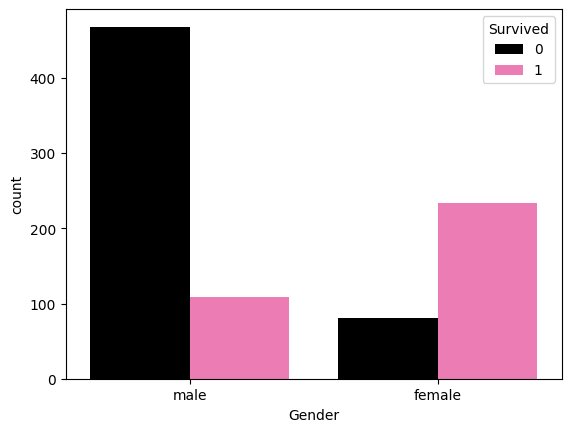

In [41]:
sns.countplot(data=titanic,x='Gender',hue = 'Survived',palette=['black','hotpink','pink'],legend=True)
plt.show()

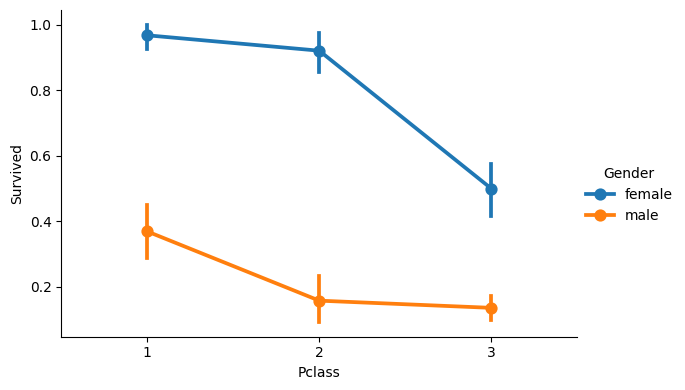

In [43]:
# 선실 등급별, 성별에 따라서 생존확률이 높다는 것을 알 수 있다.
# 두 특성을 한꺼번에 비교하는 시각화 툴이 존재한다
# Matplotlib에는 없고 Seaborn에만 존재하는 툴이다
# factorplot
sns.catplot(data=titanic,x='Pclass',y='Survived',hue='Gender',kind='point',height=4,aspect=1.5)
plt.show()

In [44]:

# 나이가 가장 낮은 승객, 높은승객 ,평균나이
titanic.Age.max(),titanic.Age.min(), titanic.Age.mean()

(np.float64(80.0), np.float64(0.42), np.float64(29.69911764705882))

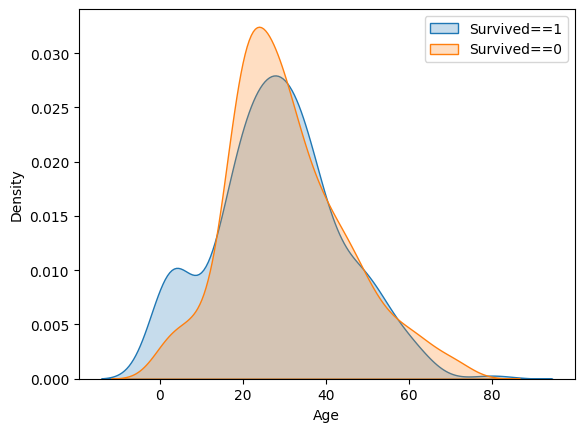

In [52]:
sns.kdeplot(
    data = titanic[titanic.Survived == 1], x='Age', label = 'Survived==1',fill=True
)

sns.kdeplot(
    data = titanic[titanic.Survived == 0], x='Age', label = 'Survived==0',fill=True
)
plt.legend(loc='best')
plt.show()

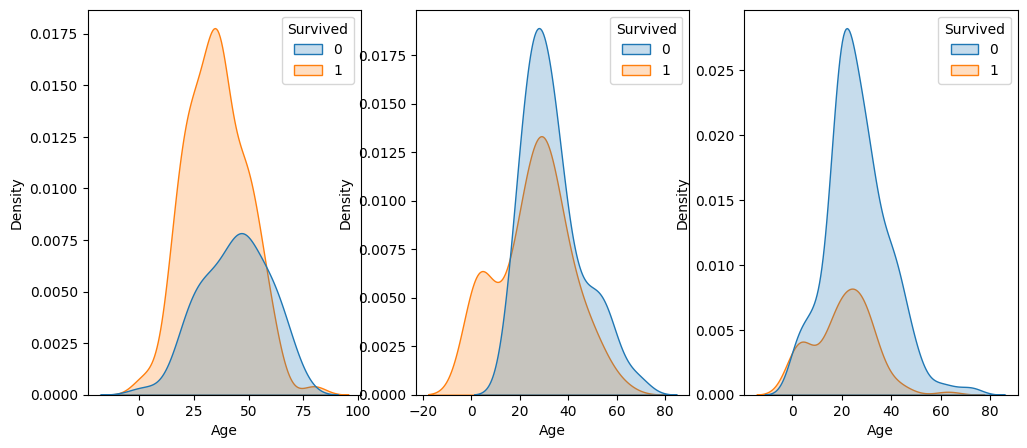

In [53]:
# 위의 표를 응용해서  Pclass별로 생존유무에대한 시각화
f, ax = plt.subplots(1,3,figsize=(12,5))
sns.kdeplot(
    data = titanic[titanic.Pclass == 1], x='Age', hue='Survived', label = 'Pclass==1',fill=True, ax=ax[0]
)
sns.kdeplot(
    data = titanic[titanic.Pclass == 2], x='Age', hue='Survived', label = 'Pclass==1',fill=True, ax=ax[1]
)
sns.kdeplot(
    data = titanic[titanic.Pclass == 3], x='Age', hue='Survived', label = 'Pclass==1',fill=True, ax=ax[2]
)
plt.show()

In [ ]:
# 클래스가 높을수록 나이 많은 사람의 비중이 커짐
# 나이대가 변하면서 생존률이 어떻게 될까

In [ ]:
# 나이대의 범위를 점점 넓혀가면서 생존률의 변화
plt.figure(figsize=(10,5))
multi_age_range = [titanic[titanic.Age<i].Survived.mean() for i in range(1,80)]
plt.plot(range(1,80), multi_age_range)    
plt.show()

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64